# Trying to make side-by-side figures for paper

### Add paths to run locally or off NIRD

In [48]:
import sys
# Add common resources folder to path
sys.path.append("/mnt/mcc-ns9600k/jonahks/git_repos/netcdf_analysis/Common/")
sys.path.append("/mnt/mcc-ns9600k/jonahks/git_repos/netcdf_analysis/")
sys.path.append("/home/jonahks/git_repos/netcdf_analysis/")
sys.path.append("/home/jonahks/git_repos/netcdf_analysis/Common/")

from imports import (
    pd, np, xr, mpl, plt, sns, os, 
    datetime, sys, crt, gridspec,
    ccrs, metrics, Iterable
    )

from functions import (
    masked_average, add_weights, sp_map,
    season_mean, get_dpm, leap_year, share_ylims,
    to_png
    )

from classes import SatComp_Metric, CT_SLF_Metric
from collections import deque
%matplotlib inline

### Check running location and adjust working directory appropriately.

In [49]:
host = os.uname()[1]
if 'jupyter' in host.split('-'): # Check if running on NIRD through the Jupyter Hub
    print('Running through MC2 Jupyter Hub')
    model_dir = '/mnt/mcc-ns9600k/jonahks/'
    os.chdir(model_dir)

else:  # Assume that we're running on a local machine and mounting NIRD
    print('Running on %s, attempting to mount ns9600k/jonahks/ from NIRD' % str(host))
    os.system('fusermount -zu ~/drivemount/')  # unmount first
    os.system('sshfs jonahks@login.nird.sigma2.no:"p/jonahks/" ~/drivemount/')    # Calling mountnird from .bashrc doesn't work
    os.chdir('/home/jonahks/drivemount/')
    save_dir = '~/DATAOUT/'
    save_to = os.path.expanduser(save_dir)

output_dir = 'figures/'
case_dir = 'satcomp/'   # inconsistent label compared to jupy_test
conv_dir ='convectivephase/'

# Check that each important directory can be accessed:    
access_paths = os.path.exists(output_dir) and os.path.exists(case_dir) and os.path.exists(conv_dir)
print('Can access all directory paths:', access_paths)

Running through MC2 Jupyter Hub
Can access all directory paths: True


## Quick function for muting the existing labels

In [50]:
def mute_ax(ax):
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_title('')

In [51]:
os.listdir("satcomp/")

['20200502_214847_singleparam_cam61_arctic2satcomp_wbf_0.2_inp_0.2',
 '20200829_1634000_FLDSC_wbf_1_inp_1',
 '20200512_012745_fitting_runs_cam61satcomp_wbf_0.2_inp_0.1',
 '20200512_013308_fitting_runs_cam6satcomp16_wbf_1.25_inp_10',
 '20200629_morn_cam61satcomp_wbf_0.5_inp_0.05',
 '20200414_205148_singleparam_cam61satcomp_wbf_0.2_inp_0.3',
 '20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1',
 '20200713_CESM2_satcomp_wbf_1_inp_100',
 'unused',
 '20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1',
 '20200414_205148_singleparam_cam61satcomp_wbf_1_inp_0.05',
 'CESM2_slfvars']

## Load metrics

In [5]:
timemetric_slf = CT_SLF_Metric(case_dir)

timemetric_slf.add_case('20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1', label="CAM6-Oslo")
timemetric_slf.add_case('20200817_4Ksst_cam6satcomp_wbf_1_inp_1',label="CAM6-Oslo +4K",path="satcomp_+4K/")

Trying to load concatenated file for 20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Trying to load concatenated file for 20200817_4Ksst_cam6satcomp_wbf_1_inp_1


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [6]:
timemetric = SatComp_Metric(case_dir)

timemetric.add_case('20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1', label="CAM6-Oslo")
timemetric.add_case('20200817_4Ksst_cam6satcomp_wbf_1_inp_1',label="CAM6-Oslo +4K",path="satcomp_+4K/")

Loading GOCCP data...done.
Loading CALIOP SLFs...done
Loading CERES-EBAF fluxes...done.
Trying to load concatenated file for 20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1
20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1 load successfully.
Trying to load concatenated file for 20200817_4Ksst_cam6satcomp_wbf_1_inp_1
20200817_4Ksst_cam6satcomp_wbf_1_inp_1 load successfully.


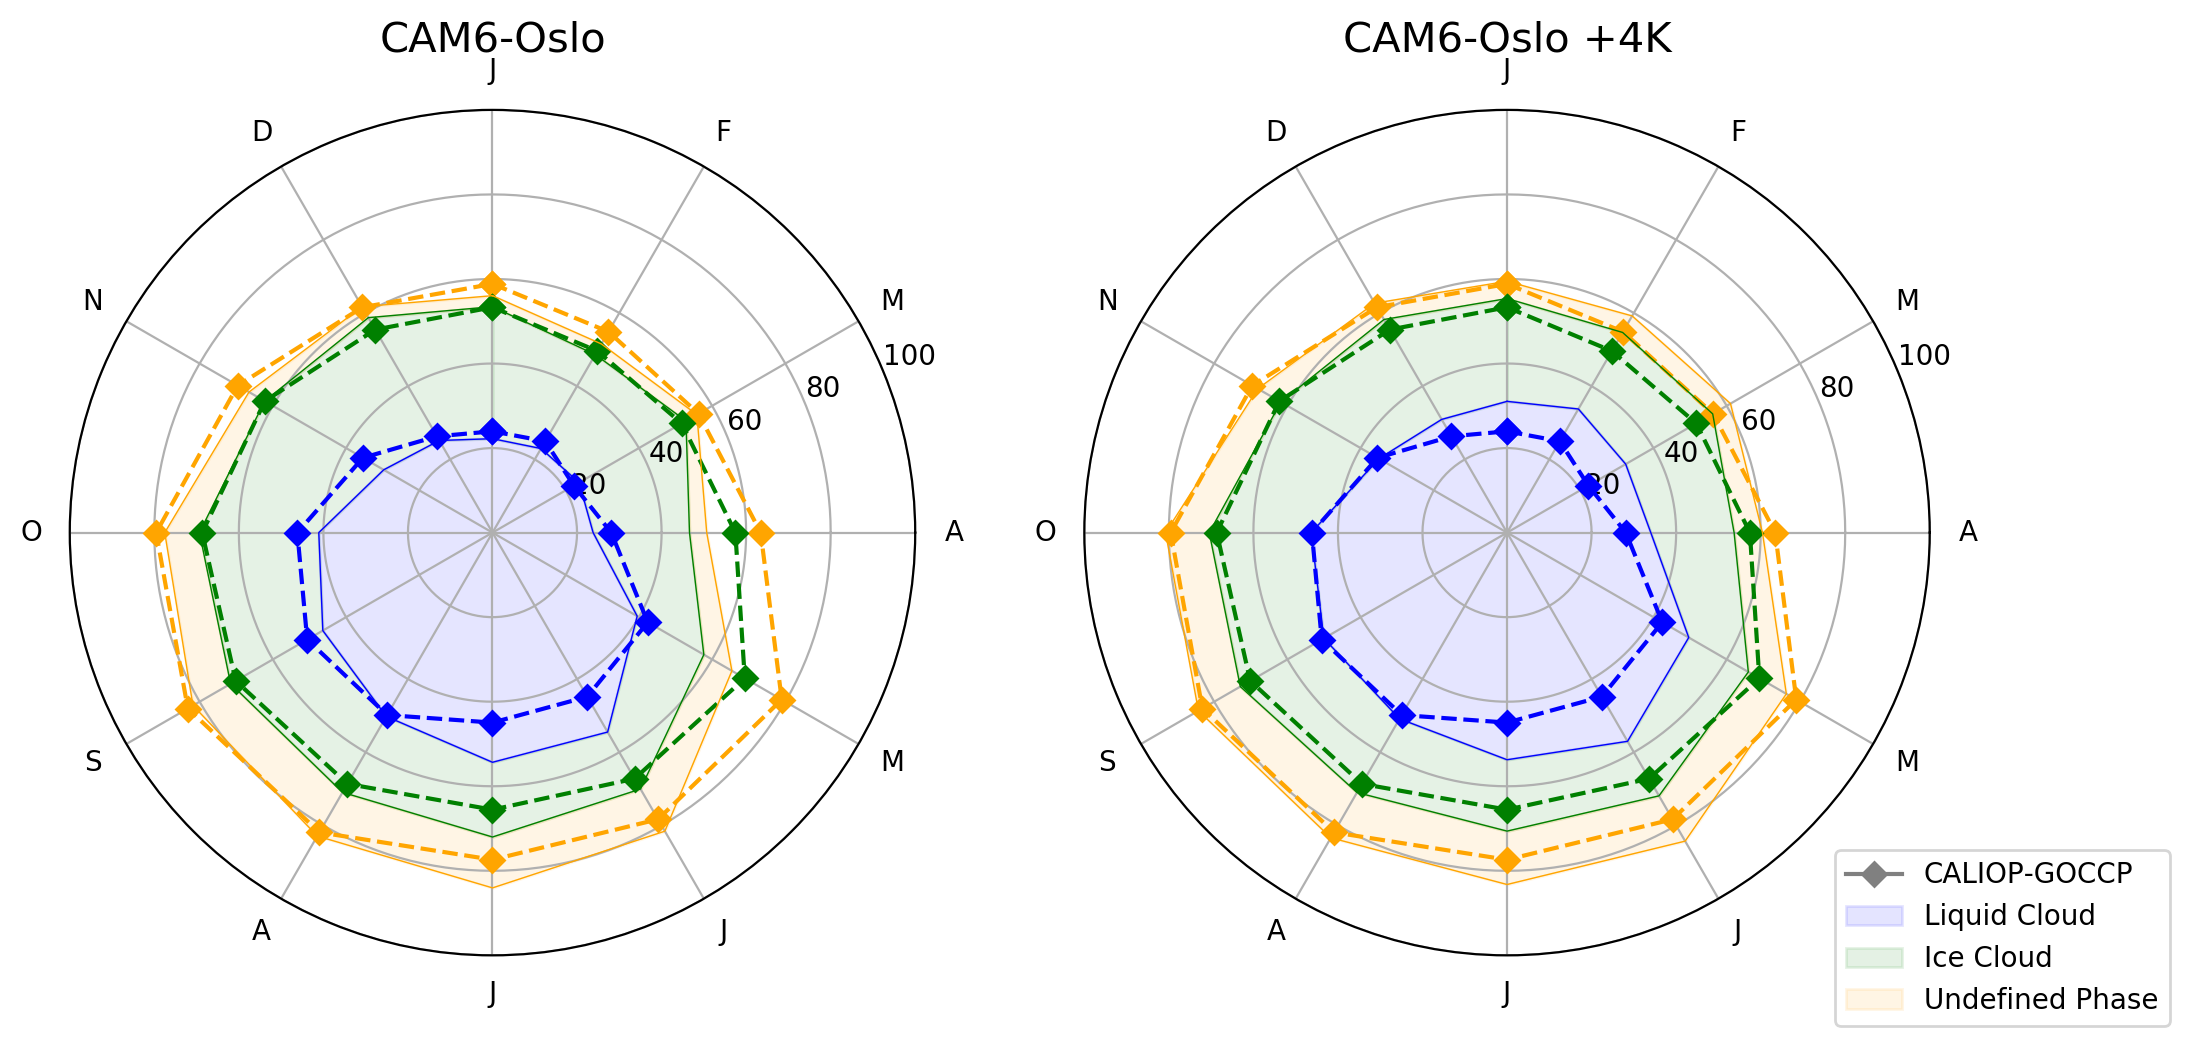

In [7]:
fig1 = timemetric.cloud_polar_plot()

In [8]:
to_png(fig1,"monthlycloud+4K")

/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


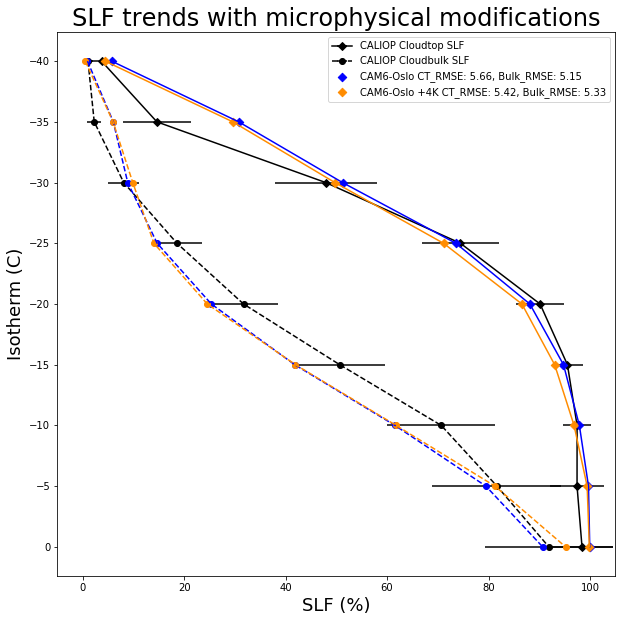

In [9]:
fig2 = timemetric_slf.plot_isos_all()

In [10]:
to_png(fig2,"SLF+4K")

Text(0.55,0.42,'d.')

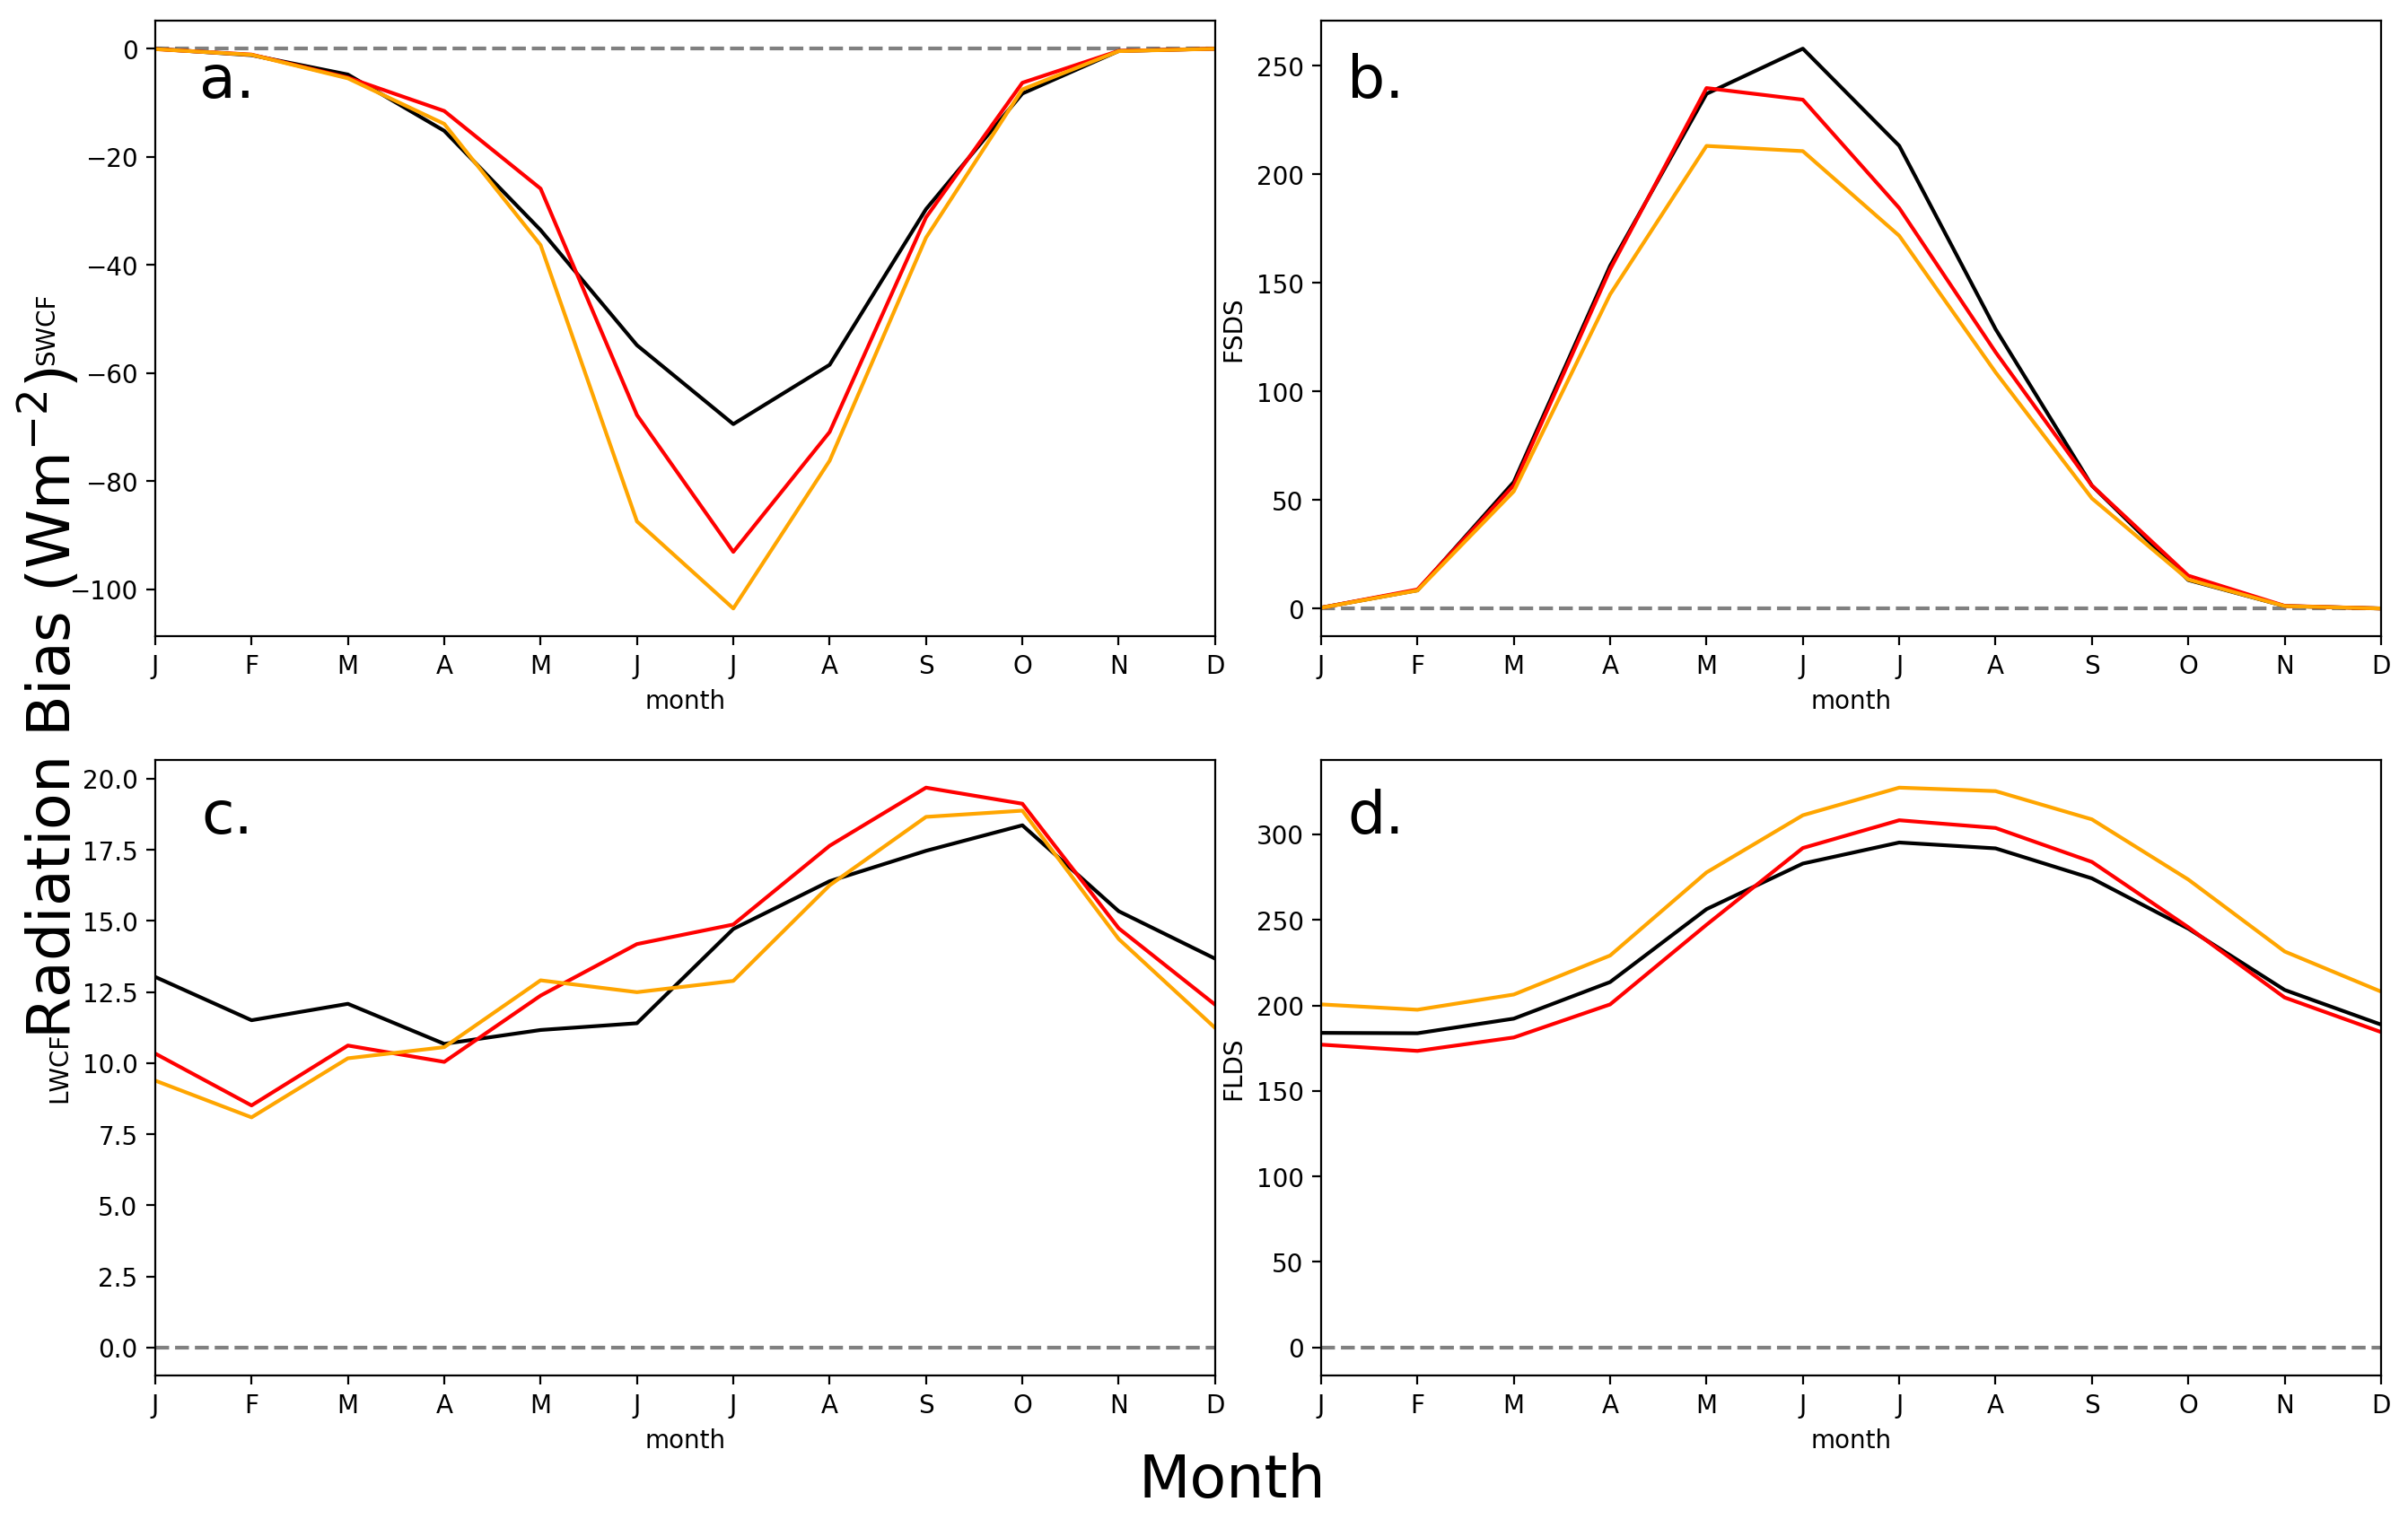

In [11]:
fig,axs = plt.subplots(nrows=2,ncols=2)#,sharey='row')
fig.set_figheight(10)
fig.set_figwidth(16)
fig.set_dpi(200)

axs = axs.flat
fig.subplots_adjust(wspace=0.1)

timemetric.plot_months_line('SWCF',ax=axs[0], bias=False)
timemetric.plot_months_line('FSDS',ax=axs[1], bias=False)
timemetric.plot_months_line('LWCF',ax=axs[2], bias=False)
timemetric.plot_months_line('FLDS',ax=axs[3], bias=False)


# Mute existing labels and draw zero lines
for i in axs:
#     mute_ax(i)
    i.hlines(0,1,12, linestyle='dashed',color='gray')
    i.set_xlim(1,12)

# axs[1].set_yticklabels([])

# Trying Latex formatting
# plt.rc('text', usetex=False)
# plt.rc('font', family='serif')

# Re-label
fig.text(0.1, 0.5, r'Radiation Bias (Wm$^{-2}$)', va='bottom', ha='center', rotation='vertical', 
         rotation_mode='anchor', fontsize=24)
fig.text(0.5, 0.05, 'Month', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=24)

fig.text(0.15, 0.83, 'a.', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=24)
fig.text(0.55, 0.83, 'b.', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=24)
fig.text(0.15, 0.42, 'c.', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=24)
fig.text(0.55, 0.42, 'd.', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=24)

In [12]:
to_png(fig,"CEREScomparison+4K")

# allmetric.plot_months_line('SWCF',ax=axs[0], bias=True)
# allmetric.plot_months_line('FSDS',ax=axs[1], bias=True)
# allmetric.plot_months_line('LWCF',ax=axs[2], bias=True)
# allmetric.plot_months_line('FLDS',ax=axs[3], bias=True)

In [13]:
da_4k = timemetric.get_case("20200817_4Ksst_cam6satcomp_wbf_1_inp_1").case_da

In [14]:
da_ =timemetric.get_case("20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1").case_da

In [15]:
da_avg = da_['T'].sel(lat=slice(70,90)).mean(('lat','lon')).groupby('time.season').mean('time')
da_4k_avg = da_4k['T'].sel(lat=slice(70,90)).mean(('lat','lon')).groupby('time.season').mean('time')

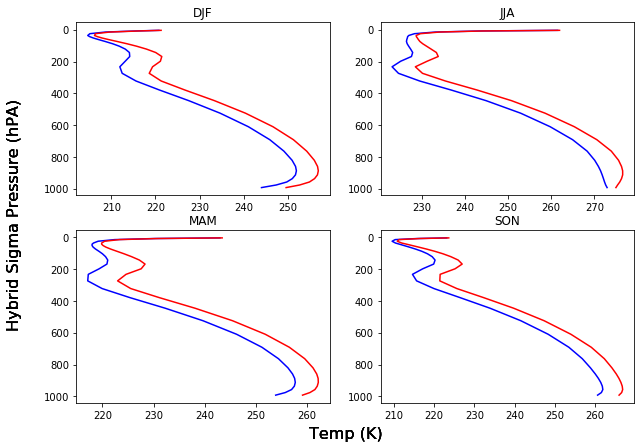

In [16]:
fig,ax=plt.subplots(2,2,figsize=(10,7))
for i,j,_ax in zip(da_avg,da_4k_avg,ax.flat):
    _ax.invert_yaxis()
    _ax.plot(i,i['lev'],label=i['season'].values,color='blue')
    _ax.plot(j,j['lev'],label=j['season'].values,color='red')
#     print(i)
#     i.plot(label=i['season'].values,color='blue',ax=_ax)
#     j.plot(label=j['season'].values,color='red',ax=_ax)
    _ax.set_title(j['season'].values)
    
    # Re-label
    fig.text(0.05, 0.5, r'Hybrid Sigma Pressure (hPA)', va='bottom', ha='center', rotation='vertical', 
             rotation_mode='anchor', fontsize=16)
    fig.text(0.5, 0.05, 'Temp (K)', va='bottom', ha='center', rotation='horizontal', 
             rotation_mode='anchor', fontsize=16)
#     plt.legend()
    
#     print(str(j['season'].values+"+4K"))
#     print(i['season'])

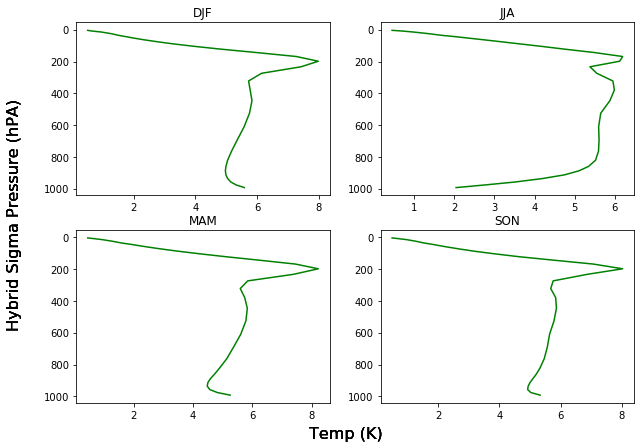

In [17]:
fig,ax=plt.subplots(2,2,figsize=(10,7))
for i,j,_ax in zip(da_avg,da_4k_avg,ax.flat):
    _ax.invert_yaxis()
#     _ax.plot(i,i['lev'],label=i['season'].values,color='blue')
    _ax.plot(j-i,j['lev'],label=j['season'].values,color='green')
#     print(i)
#     i.plot(label=i['season'].values,color='blue',ax=_ax)
#     j.plot(label=j['season'].values,color='red',ax=_ax)
    _ax.set_title(j['season'].values)
    
    # Re-label
    fig.text(0.05, 0.5, r'Hybrid Sigma Pressure (hPA)', va='bottom', ha='center', rotation='vertical', 
             rotation_mode='anchor', fontsize=16)
    fig.text(0.5, 0.05, 'Temp (K)', va='bottom', ha='center', rotation='horizontal', 
             rotation_mode='anchor', fontsize=16)
#     plt.legend()
    
#     print(str(j['season'].values+"+4K"))
#     print(i['season'])

In [18]:
to_png(fig,"atmostemps_+4K_change")

All cases (CAM6 maybe)

In [19]:
allmetric = SatComp_Metric(case_dir)

allmetric.add_case('20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1', label="CAM6-Oslo")
allmetric.add_case('CESM2_slfvars', label="CAM6")
allmetric.add_case('20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1', label="CAM6-OsloIce")

allmetric.add_case("20200512_013308_fitting_runs_cam6satcomp16_wbf_1.25_inp_10",label='CAM6-Oslo \n Fit 1')
allmetric.add_case('20200629_morn_cam61satcomp_wbf_0.5_inp_0.05',label='CAM6-OsloIce \n Fit 2')
allmetric.add_case('20200512_012745_fitting_runs_cam61satcomp_wbf_0.2_inp_0.1',label='CAM6-OsloIce \n Fit 3')
allmetric.add_case('20200713_CESM2_satcomp_wbf_1_inp_100',label="CAM6 Fit")

Loading GOCCP data...done.
Loading CALIOP SLFs...done
Loading CERES-EBAF fluxes...done.
Trying to load concatenated file for 20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1
20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1 load successfully.
Trying to load concatenated file for CESM2_slfvars
CESM2_slfvars load successfully.
Trying to load concatenated file for 20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1
20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1 load successfully.
Trying to load concatenated file for 20200512_013308_fitting_runs_cam6satcomp16_wbf_1.25_inp_10
20200512_013308_fitting_runs_cam6satcomp16_wbf_1.25_inp_10 load successfully.
Trying to load concatenated file for 20200629_morn_cam61satcomp_wbf_0.5_inp_0.05
20200629_morn_cam61satcomp_wbf_0.5_inp_0.05 load successfully.
Trying to load concatenated file for 20200512_012745_fitting_runs_cam61satcomp_wbf_0.2_inp_0.1
20200512_012745_fitting_runs_cam61satcomp_wbf_0.2_inp_0.1 load successfully.
Trying to load

In [20]:
allmetric_slf = CT_SLF_Metric(case_dir)

allmetric_slf.add_case('20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1', label="CAM6-Oslo")
allmetric_slf.add_case('CESM2_slfvars', label="CAM6")
allmetric_slf.add_case('20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1', label="CAM6-OsloIce")

allmetric_slf.add_case("20200512_013308_fitting_runs_cam6satcomp16_wbf_1.25_inp_10",label='CAM6-Oslo \n Fit 1')
allmetric_slf.add_case('20200629_morn_cam61satcomp_wbf_0.5_inp_0.05',label='CAM6-OsloIce \n Fit 2')
allmetric_slf.add_case('20200512_012745_fitting_runs_cam61satcomp_wbf_0.2_inp_0.1',label='CAM6-OsloIce \n Fit 3')
allmetric_slf.add_case('20200713_CESM2_satcomp_wbf_1_inp_100',label="CAM6 Fit")

Trying to load concatenated file for 20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1
Trying to load concatenated file for CESM2_slfvars


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Trying to load concatenated file for 20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1
Trying to load concatenated file for 20200512_013308_fitting_runs_cam6satcomp16_wbf_1.25_inp_10


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Trying to load concatenated file for 20200629_morn_cam61satcomp_wbf_0.5_inp_0.05
Trying to load concatenated file for 20200512_012745_fitting_runs_cam61satcomp_wbf_0.2_inp_0.1


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Trying to load concatenated file for 20200713_CESM2_satcomp_wbf_1_inp_100


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [21]:
to_png(forlegend,"all_legend")

NameError: name 'forlegend' is not defined

Base models (CAM6-Oslo, CAM6, CAM6-OsloIce)

In [22]:
basemetric = SatComp_Metric(case_dir)
# mainmetric.add_case('20200327_132118_singleparam_noresm2satcomp_wbf_1_inp_1') # origin point

basemetric.add_case('20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1', label="CAM6-Oslo")
basemetric.add_case('CESM2_slfvars', label="CAM6")
basemetric.add_case('20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1', label="CAM6-OsloIce")

Loading GOCCP data...done.
Loading CALIOP SLFs...done
Loading CERES-EBAF fluxes...done.
Trying to load concatenated file for 20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1
20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1 load successfully.
Trying to load concatenated file for CESM2_slfvars
CESM2_slfvars load successfully.
Trying to load concatenated file for 20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1
20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1 load successfully.


In [4]:
basemetric_slf = CT_SLF_Metric(case_dir)

basemetric_slf.add_case('20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1', label="CAM6-Oslo")
basemetric_slf.add_case('CESM2_slfvars', label="CAM6")
basemetric_slf.add_case('20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1', label="CAM6-OsloIce")

Trying to load concatenated file for 20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1
Trying to load concatenated file for CESM2_slfvars


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Trying to load concatenated file for 20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Fitted models

In [24]:
fitmetric = SatComp_Metric(case_dir)

fitmetric.add_case("20200512_013308_fitting_runs_cam6satcomp16_wbf_1.25_inp_10",label='CAM6-Oslo \n Fit 1')
# fitmetric.add_case('20200414_205148_singleparam_cam61satcomp_wbf_1_inp_0.05',label='CAM6-OsloIce \n Fit 2')
fitmetric.add_case('20200629_morn_cam61satcomp_wbf_0.5_inp_0.05',label='CAM6-OsloIce \n Fit 2')
fitmetric.add_case('20200512_012745_fitting_runs_cam61satcomp_wbf_0.2_inp_0.1',label='CAM6-OsloIce \n Fit 3')
fitmetric.add_case('20200713_CESM2_satcomp_wbf_1_inp_100',label="CAM6 Fit")

Loading GOCCP data...done.
Loading CALIOP SLFs...done
Loading CERES-EBAF fluxes...done.
Trying to load concatenated file for 20200512_013308_fitting_runs_cam6satcomp16_wbf_1.25_inp_10
20200512_013308_fitting_runs_cam6satcomp16_wbf_1.25_inp_10 load successfully.
Trying to load concatenated file for 20200629_morn_cam61satcomp_wbf_0.5_inp_0.05
20200629_morn_cam61satcomp_wbf_0.5_inp_0.05 load successfully.
Trying to load concatenated file for 20200512_012745_fitting_runs_cam61satcomp_wbf_0.2_inp_0.1
20200512_012745_fitting_runs_cam61satcomp_wbf_0.2_inp_0.1 load successfully.
Trying to load concatenated file for 20200713_CESM2_satcomp_wbf_1_inp_100
20200713_CESM2_satcomp_wbf_1_inp_100 load successfully.


In [17]:
fitmetric_slf = CT_SLF_Metric(case_dir)

fitmetric_slf.add_case("20200512_013308_fitting_runs_cam6satcomp16_wbf_1.25_inp_10",label='CAM6-Oslo Fit 1')
fitmetric_slf.add_case('20200629_morn_cam61satcomp_wbf_0.5_inp_0.05',label='CAM6-OsloIce Fit 2')
# fitmetric_slf.add_case('20200414_205148_singleparam_cam61satcomp_wbf_1_inp_0.05',label='CAM6-OsloIce Fit 2')
fitmetric_slf.add_case('20200512_012745_fitting_runs_cam61satcomp_wbf_0.2_inp_0.1',label='CAM6-OsloIce Fit 3')
# fitmetric_slf.add_case('CESM2_fittest',path='mnth15runs/')
fitmetric_slf.add_case('20200713_CESM2_satcomp_wbf_1_inp_100',label="CAM6 Fit")

Trying to load concatenated file for 20200512_013308_fitting_runs_cam6satcomp16_wbf_1.25_inp_10
Trying to load concatenated file for 20200629_morn_cam61satcomp_wbf_0.5_inp_0.05


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Trying to load concatenated file for 20200512_012745_fitting_runs_cam61satcomp_wbf_0.2_inp_0.1
Trying to load concatenated file for 20200713_CESM2_satcomp_wbf_1_inp_100


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


## Figure making

NameError: name 'allmetric' is not defined

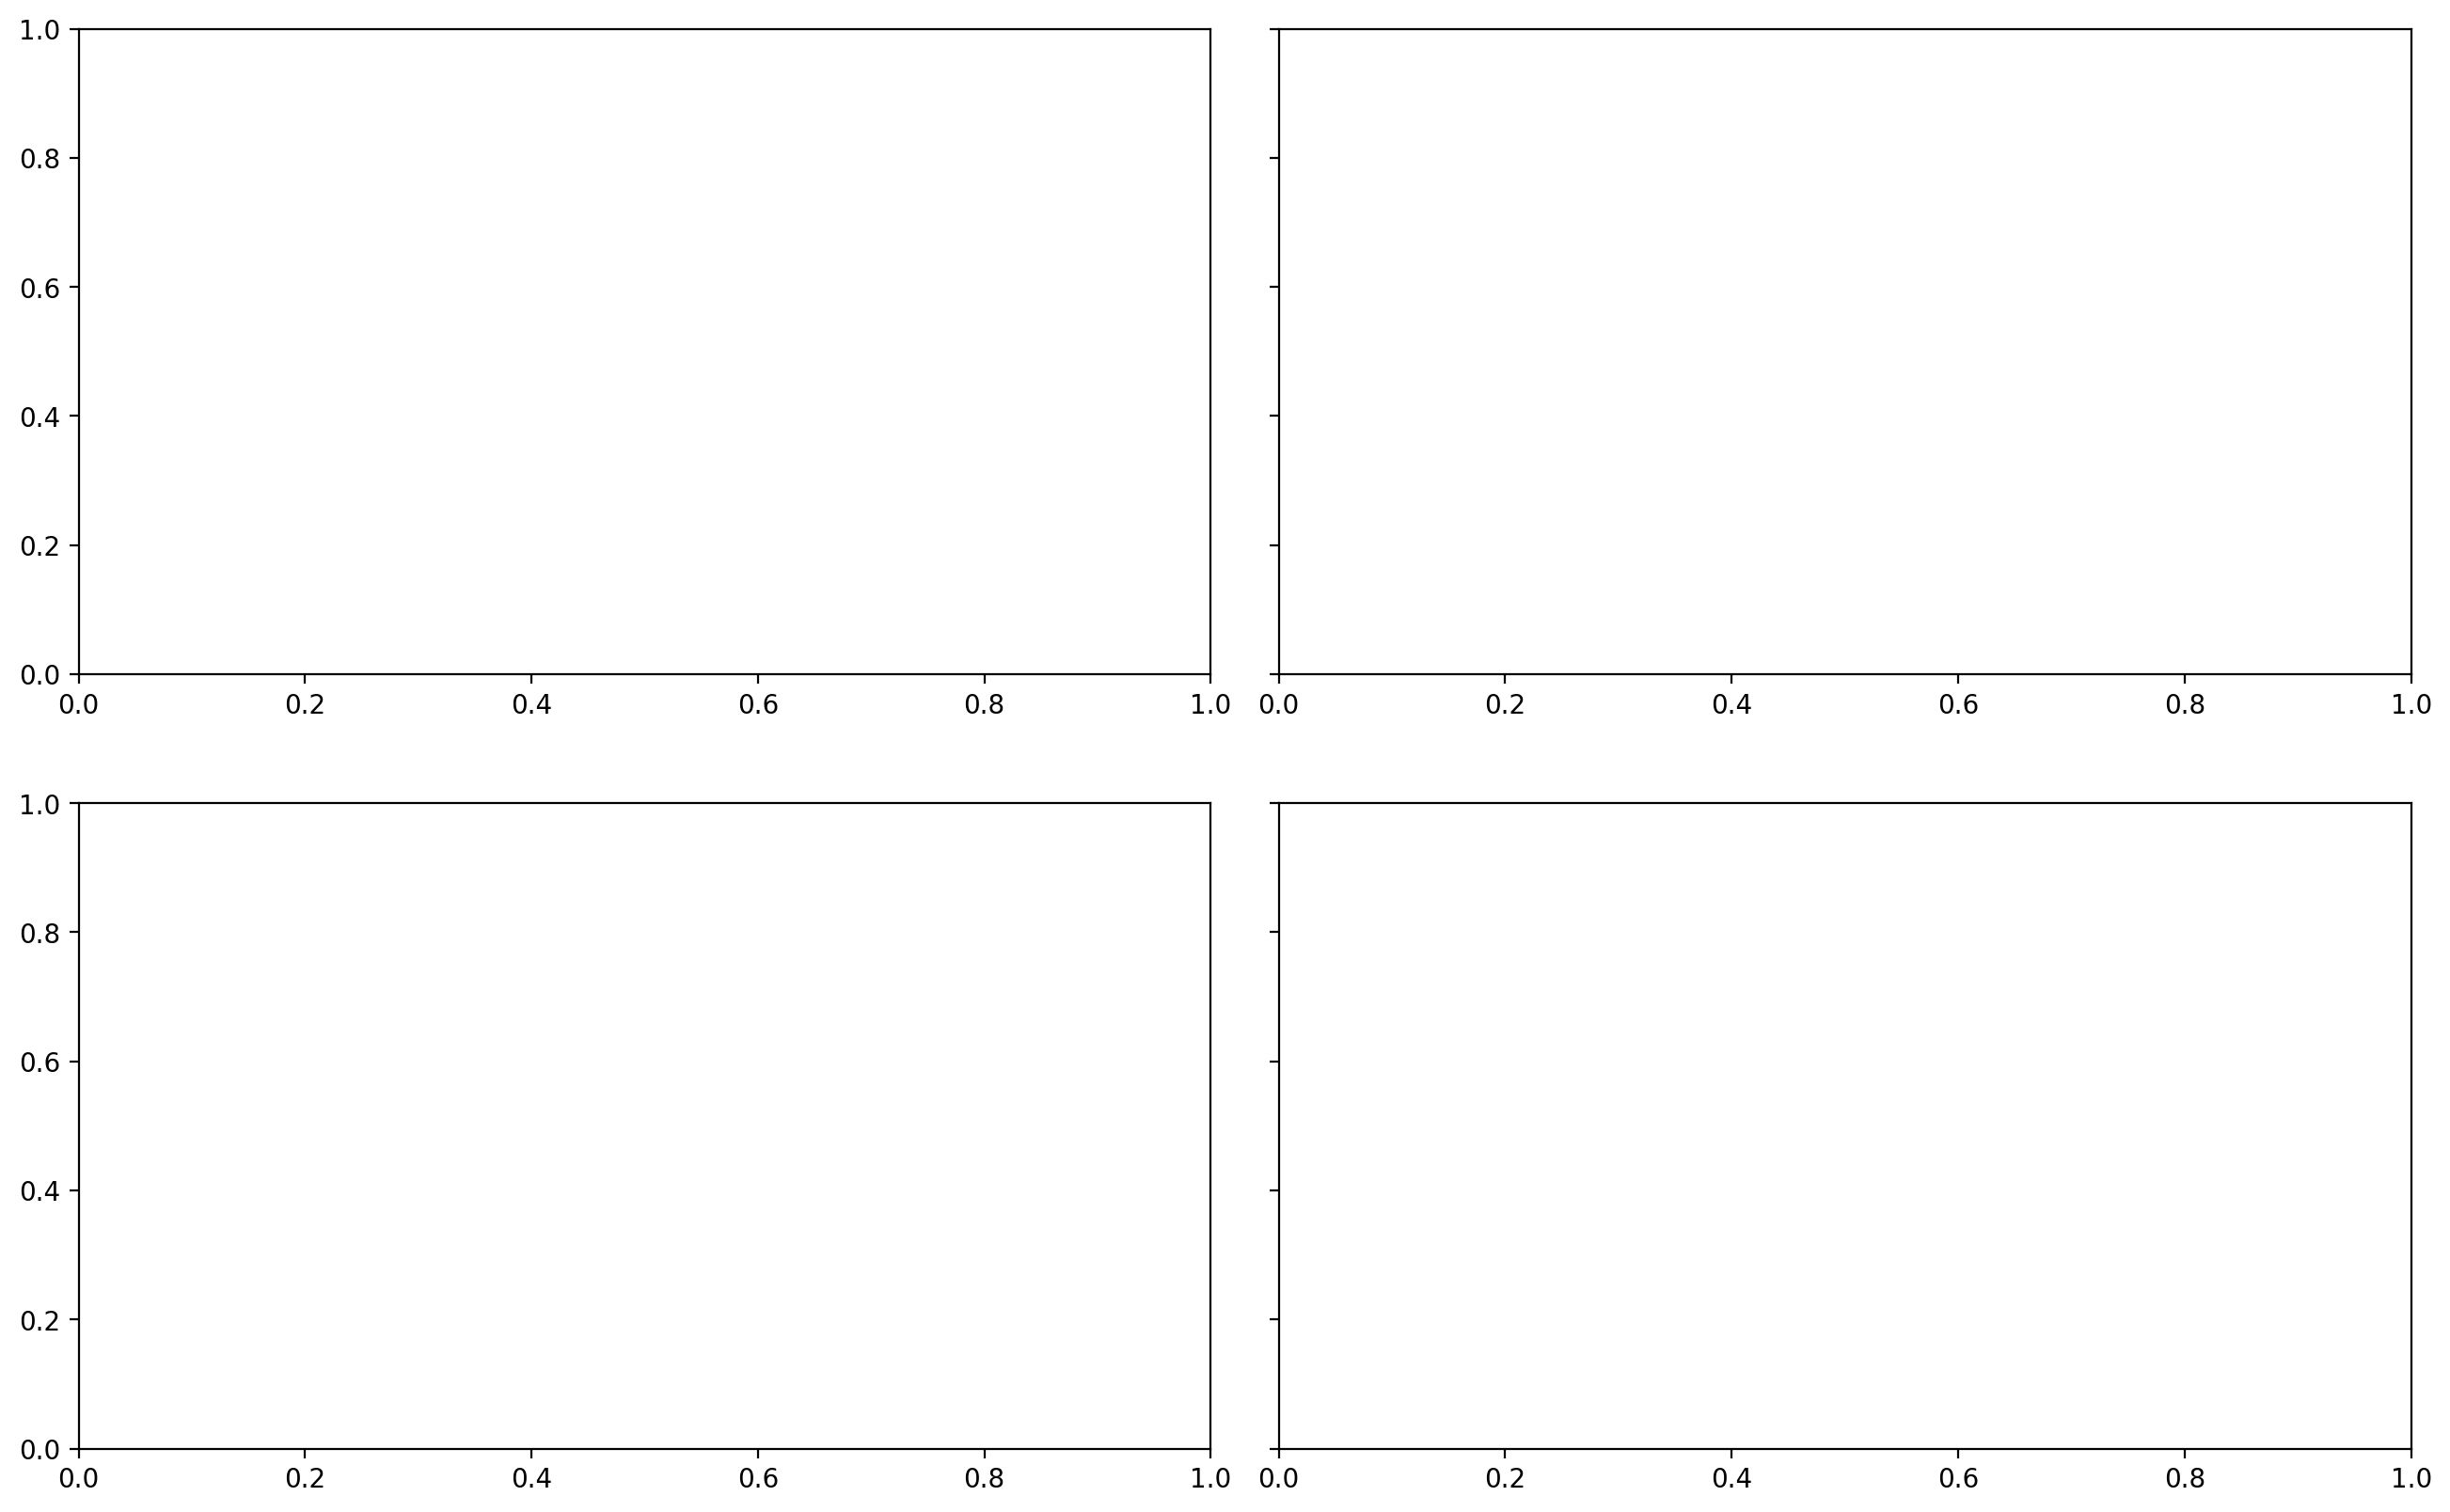

In [6]:
fig,axs = plt.subplots(nrows=2,ncols=2,sharey='row')
fig.set_figheight(10)
fig.set_figwidth(16)
fig.set_dpi(200)

axs = axs.flat
fig.subplots_adjust(wspace=0.06)

allmetric.plot_months_line('SWCF',ax=axs[0], bias=True)
allmetric.plot_months_line('FSDS',ax=axs[1], bias=True)
allmetric.plot_months_line('LWCF',ax=axs[2], bias=True)
allmetric.plot_months_line('FLDS',ax=axs[3], bias=True)


# Mute existing labels and draw zero lines
for i in axs:
    mute_ax(i)
    i.hlines(0,1,12, linestyle='dashed',color='gray')
    i.set_xlim(1,12)

# axs[1].set_yticklabels([])

# Trying Latex formatting
# plt.rc('text', usetex=False)
# plt.rc('font', family='serif')

# Re-label
fig.text(0.1, 0.5, r'Radiation Bias (Wm$^{-2}$)', va='bottom', ha='center', rotation='vertical', 
         rotation_mode='anchor', fontsize=24)
fig.text(0.5, 0.05, 'Month', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=24)

fig.text(0.15, 0.83, 'a.', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=24)
fig.text(0.55, 0.83, 'b.', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=24)
fig.text(0.15, 0.42, 'c.', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=24)
fig.text(0.55, 0.42, 'd.', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=24)

In [ ]:
to_png(fig,'surface_and_cloud_biases')

In [ ]:
just_legend = allmetric.plot_months_line('FLDS')

In [ ]:
to_png(just_legend,'months_all_legend')

In [ ]:
# https://stackoverflow.com/questions/55419931/can-you-copy-only-some-subplots-to-a-new-figure

import pickle
import io

# pickle the figure, then unpickle it to a new figure
buf = io.BytesIO()
pickle.dump(fig, buf)
buf.seek(0)
fig2=pickle.load(buf)

In [ ]:
def show_figure(fig):
    # https://stackoverflow.com/questions/49503869/attributeerror-while-trying-to-load-the-pickled-matplotlib-figure
    # create a dummy figure and use its
    # manager to display "fig"  
    dummy = plt.figure()
    new_manager = dummy.canvas.manager
    new_manager.canvas.figure = fig
    fig.set_canvas(new_manager.canvas)

In [ ]:
axs

Remove axes object and send it somewhere else. Dev.
Based on:
https://stackoverflow.com/questions/6309472/matplotlib-can-i-create-axessubplot-objects-then-add-them-to-a-figure-instance

In [ ]:
plts.axes

In [ ]:
tokeep=[1,2]
axestokeep=[]

for i,a in enumerate(fig2.axes):
    if not i in(tokeep):
        fig2.delaxes(a)
    else:
        axestokeep.extend([a])

axestokeep[0].change_geometry(1,2,1)
axestokeep[1].change_geometry(1,2,2)

In [ ]:
fig2.show()

In [ ]:
num_rows = 10
num_cols = 1
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
labels = ["Label {}".format(i+1) for i in range(num_rows)]

def myplot(i, ax):
    ax.plot(np.arange(10), np.arange(10)**i, color=colors[i])
    ax.set_ylabel(labels[i])


fig, axs = plt.subplots(num_rows, num_cols, sharex=True)
for i in range(num_rows):
     myplot(i, axs[i])


def on_click(event):
    axes = event.inaxes
    if not axes: return
    inx = list(fig.axes).index(axes)
    fig2 = plt.figure()
    ax = fig2.add_subplot(111)
    myplot(inx, ax)
    fig2.show()

fig.canvas.mpl_connect('button_press_event', on_click)

plt.show()


## SLF curves figure

/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Text(0.85,0.8,'b.')

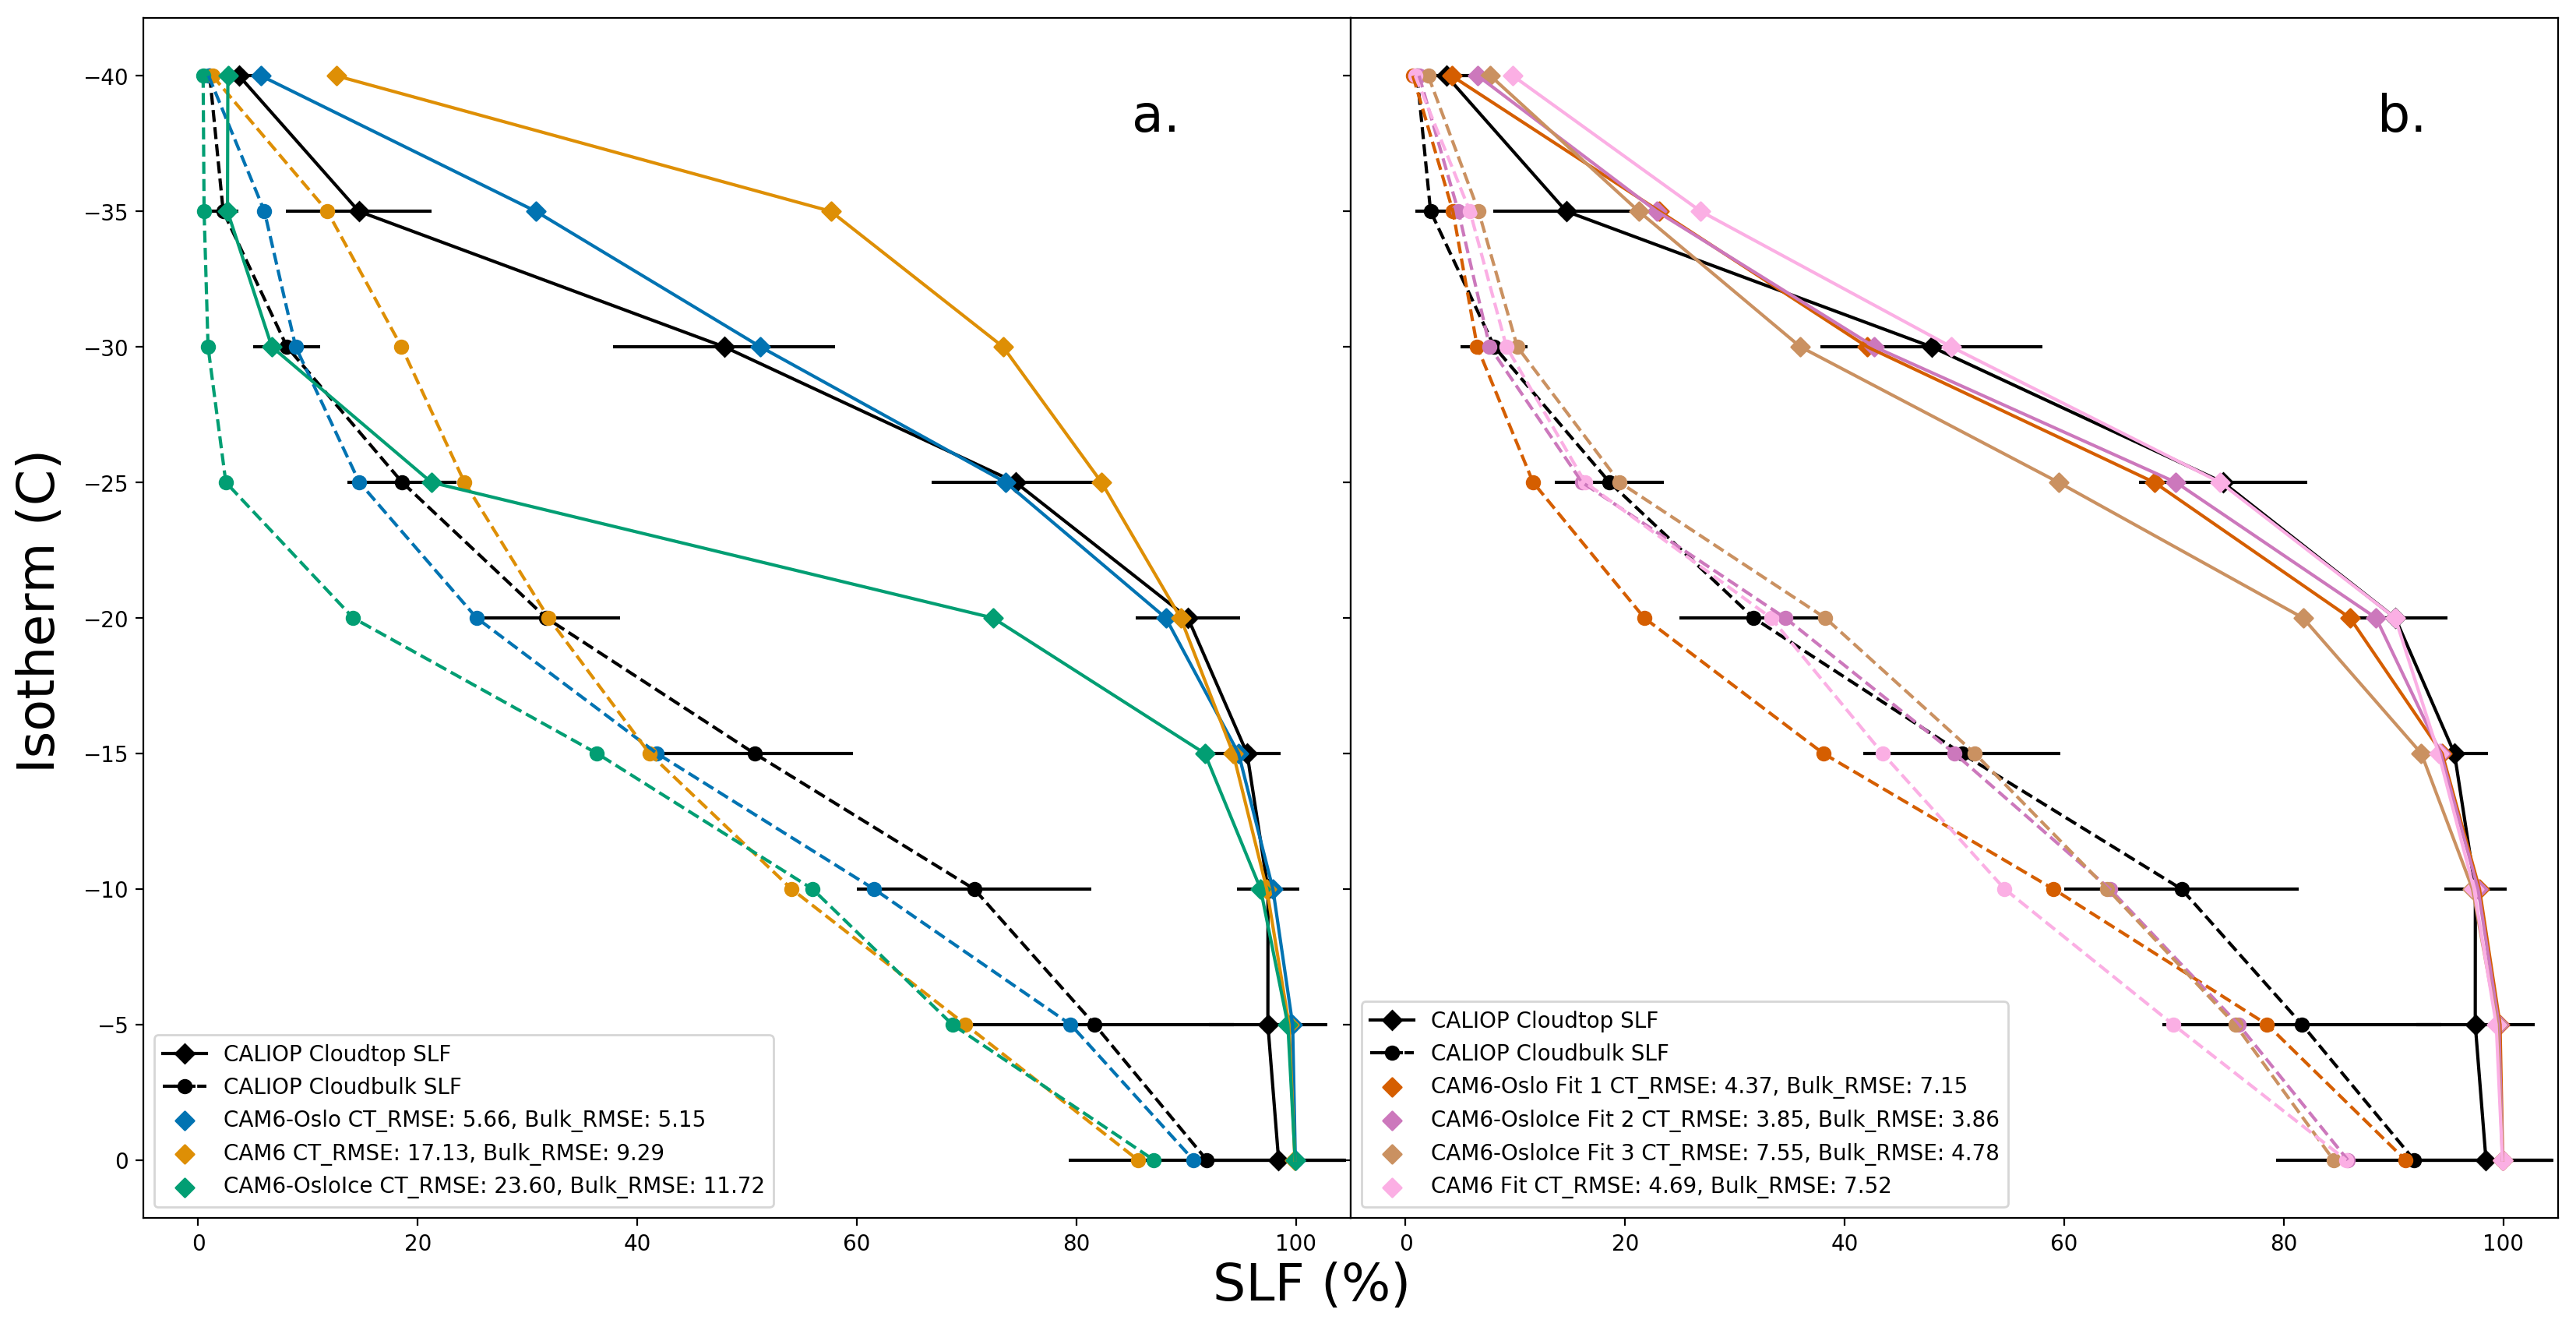

In [54]:
# fitmetric_slf.colors = fitmetric_slf.colors[3:] # this is causing a non-repeatable error. Running out of colors
# plt.style.use('seaborn-colorblind')
# plt.style.use('seaborn-whitegrid')

plt.style.use('default')
basemetric_slf.colors = sns.color_palette("colorblind")[:3]
fitmetric_slf.colors = sns.color_palette("colorblind")[3:]

fig,axs = plt.subplots(nrows=1,ncols=2)#,sharey=True)
fig.set_figheight(10)
fig.set_figwidth(20)
fig.set_dpi(200)

# axs[0].invert_yaxis()
o = basemetric_slf.plot_isos_all(ax=axs[0])

# axs[1].invert_yaxis()
oo = fitmetric_slf.plot_isos_all(ax=axs[1])

fig.subplots_adjust(wspace=0.0)

axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[1].set_ylabel('')
axs[1].set_xlabel('')
axs[0].set_title('')
axs[1].set_title('')
# axs[1].set_yticks(np.arange(-40,0,5),' ')
# axs[1].get_yaxis().set_ticks([])
axs[1].set_yticklabels([])

# handles, labels = axs[1].get_legend_handles_labels()
# axs[1].legend(handles, labels, loc = 'lower left')

fig.text(0.1, 0.5, 'Isotherm (C)', va='bottom', ha='center', rotation='vertical', 
         rotation_mode='anchor', fontsize=24)
fig.text(0.5, 0.05, 'SLF (%)', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=24)

# fig.text(0.15, 0.2, 'a.', va='bottom', ha='center', rotation='horizontal', 
#          rotation_mode='anchor', fontsize=24)
# fig.text(0.55, 0.2, 'b.', va='bottom', ha='center', rotation='horizontal', 
#          rotation_mode='anchor', fontsize=24)

fig.text(0.45, 0.8, 'a.', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=24)
fig.text(0.85, 0.8, 'b.', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=24)

In [ ]:
to_png(fig,"combined_slfcurves")

In [ ]:
forlegend = allmetric_slf.plot_isos_all()

In [ ]:
to_png(forlegend,"all_legend")

## Radiative Biases Figure(s)

In [ ]:
fig,axs = plt.subplots(nrows=1,ncols=2,sharey='row')
fig.set_figheight(5)
fig.set_figwidth(15)
fig.set_dpi(200)

axs = axs.flat
fig.subplots_adjust(wspace=0.06)

allmetric.plot_months_line('SWCF',ax=axs[0], bias=True)
allmetric.plot_months_line('FSDS',ax=axs[1], bias=True)
# allmetric.plot_months_line('LWCF',ax=axs[2], bias=False)
# allmetric.plot_months_line('FLDS',ax=axs[3], bias=False)


# Mute existing labels and draw zero lines
for i in axs:
    mute_ax(i)
    i.hlines(0,1,12, linestyle='dashed',color='gray')
    i.set_xlim(1,12)
# axs[0].set_ylim(-35,10)
# axs[1].set_ylim(-35,10)
# axs[-1].set_ylim(150,325)
# axs[1].set_yticklabels([])

# Trying Latex formatting
# plt.rc('text', usetex=False)
# plt.rc('font', family='serif')

# Re-label
fig.text(0.09, 0.5, r'Radiation Bias (Wm$^{-2}$)', va='bottom', ha='center', rotation='vertical', 
         rotation_mode='anchor', fontsize=24)
fig.text(0.5, -0.01, 'Month', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=24)

fig.text(0.15, 0.78, 'a.', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=24)
fig.text(0.55, 0.78, 'b.', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=24)
# fig.text(0.15, 0.42, 'c.', va='bottom', ha='center', rotation='horizontal', 
#          rotation_mode='anchor', fontsize=24)
# fig.text(0.55, 0.42, 'd.', va='bottom', ha='center', rotation='horizontal', 
#          rotation_mode='anchor', fontsize=24)

In [ ]:
to_png(fig,'sw_rad_biases')

In [ ]:
# fig,axs = plt.subplots(nrows=2,ncols=2,sharey='row',sharex='col')
fig,axs = plt.subplots(nrows=2,ncols=2,sharex='col')
fig.set_figheight(10)
fig.set_figwidth(16)
fig.set_dpi(200)

axs = axs.flat
fig.subplots_adjust(wspace=0.06,hspace=0.08)

allmetric.plot_months_line('FSDS',ax=axs[0], bias=False)
allmetric.plot_months_line('SWCF',ax=axs[1], bias=False)
allmetric.plot_months_line('FLDS',ax=axs[2], bias=False)
allmetric.plot_months_line('LWCF',ax=axs[3], bias=False)


# Mute existing labels and draw zero lines
for i in axs:
    mute_ax(i)
#     i.hlines(0,1,12, linestyle='dashed',color='gray')
    i.set_xlim(1,12)
# axs[0].set_ylim(-35,10)
# axs[1].set_ylim(-35,10)
# axs[-1].set_ylim(150,325)
# axs[1].set_yticklabels([])

# Trying Latex formatting
# plt.rc('text', usetex=False)
# plt.rc('font', family='serif')

# Re-label
fig.text(0.09, 0.5, r'Radiation Bias (Wm$^{-2}$)', va='bottom', ha='center', rotation='vertical', 
         rotation_mode='anchor', fontsize=24)
fig.text(0.5, 0.05, 'Month', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=24)

fig.text(0.18, 0.83, 'a. SW Down', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=16)
fig.text(0.57, 0.83, 'b. SW CRE', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=16)
fig.text(0.18, 0.44, 'c. LW Down', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=16)
fig.text(0.57, 0.44, 'd. LW CRE', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=16)

In [ ]:
allmetric.plot_months_line('FLDS',ax=axs[2], bias=False)


In [ ]:
to_png(fig,'rad_biases_labelled')

In [ ]:
fig,axs = plt.subplots(nrows=4,ncols=1,sharex=True)#,sharey='row')
fig.set_figheight(10)
fig.set_figwidth(16)
fig.set_dpi(200)

axs = axs.flat
fig.subplots_adjust(wspace=0.06)

allmetric.plot_months_line('FSDS',ax=axs[0], bias=True)
allmetric.plot_months_line('SWCF',ax=axs[1], bias=True)
allmetric.plot_months_line('CLDTOT_CAL',ax=axs[2], bias=True)
allmetric.plot_months_line('CLDTOT_CAL_ICE',ax=axs[3], bias=True)


# Mute existing labels and draw zero lines
for i in axs:
    mute_ax(i)
    i.hlines(0,1,12, linestyle='dashed',color='gray')
    i.set_xlim(1,12)
axs[0].set_ylim(-35,10)
axs[1].set_ylim(-35,10)
# axs[-1].set_ylim(150,325)
# axs[1].set_yticklabels([])
axs[0].set_ylabel(r'Shortwave Flux (Wm$^{-2}$)' + "\n")
axs[1].set_ylabel(r'Shortwave Cloud' + "\n" + 'Radiative Effect (Wm$^{-2}$)')
axs[2].set_ylabel(r'CLDTOT_CAL' + "\n")
axs[3].set_ylabel(r'CLDTOT_CAL_ICE' + "\n")
# axs[2].set_ylabel(r'Longwave Flux (Wm$^{-2}$)' + "\n")
# axs[3].set_ylabel(r'Longwave Cloud' + "\n" + 'Radiative Effect (Wm$^{-2}$)')
# Trying Latex formatting
# plt.rc('text', usetex=False)
# plt.rc('font', family='serif')

# Re-label
# fig.text(0.1, 0.5, r'Radiation Bias (Wm$^{-2}$)', va='bottom', ha='center', rotation='vertical', 
#          rotation_mode='anchor', fontsize=24)
fig.text(0.5, 0.05, 'Month', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=24)

# fig.text(0.15, 0.83, 'a.', va='bottom', ha='center', rotation='horizontal', 
#          rotation_mode='anchor', fontsize=24)
# fig.text(0.55, 0.83, 'b.', va='bottom', ha='center', rotation='horizontal', 
#          rotation_mode='anchor', fontsize=24)
# fig.text(0.15, 0.42, 'c.', va='bottom', ha='center', rotation='horizontal', 
#          rotation_mode='anchor', fontsize=24)
# fig.text(0.55, 0.42, 'd.', va='bottom', ha='center', rotation='horizontal', 
#          rotation_mode='anchor', fontsize=24)

In [ ]:
fig,axs = plt.subplots(nrows=4,ncols=1,sharex=True)#,sharey='row')
fig.set_figheight(10)
fig.set_figwidth(16)
fig.set_dpi(200)

axs = axs.flat
fig.subplots_adjust(wspace=0.06)

allmetric.plot_months_line('FLDS',ax=axs[0], bias=True)
allmetric.plot_months_line('LWCF',ax=axs[1], bias=True)
allmetric.plot_months_line('CLDTOT_CAL',ax=axs[2], bias=True)
allmetric.plot_months_line('CLDTOT_CAL_LIQ',ax=axs[3], bias=True)


# Mute existing labels and draw zero lines
for i in axs:
    mute_ax(i)
    i.hlines(0,1,12, linestyle='dashed',color='gray')
    i.set_xlim(1,12)
# axs[0].set_ylim(-35,10)
# axs[1].set_ylim(-35,10)
# axs[-1].set_ylim(150,325)
# axs[1].set_yticklabels([])
axs[0].set_ylabel(r'Longwave Flux (Wm$^{-2}$)' + "\n")
axs[1].set_ylabel(r'Longwave Cloud' + "\n" + 'Radiative Effect (Wm$^{-2}$)')
axs[2].set_ylabel(r'CLDTOT_CAL' + "\n")
axs[3].set_ylabel(r'CLDTOT_CAL_LIQ' + "\n")
# axs[2].set_ylabel(r'Longwave Flux (Wm$^{-2}$)' + "\n")
# axs[3].set_ylabel(r'Longwave Cloud' + "\n" + 'Radiative Effect (Wm$^{-2}$)')
# Trying Latex formatting
# plt.rc('text', usetex=False)
# plt.rc('font', family='serif')

# Re-label
# fig.text(0.1, 0.5, r'Radiation Bias (Wm$^{-2}$)', va='bottom', ha='center', rotation='vertical', 
#          rotation_mode='anchor', fontsize=24)
fig.text(0.5, 0.05, 'Month', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=24)

# fig.text(0.15, 0.83, 'a.', va='bottom', ha='center', rotation='horizontal', 
#          rotation_mode='anchor', fontsize=24)
# fig.text(0.55, 0.83, 'b.', va='bottom', ha='center', rotation='horizontal', 
#          rotation_mode='anchor', fontsize=24)
# fig.text(0.15, 0.42, 'c.', va='bottom', ha='center', rotation='horizontal', 
#          rotation_mode='anchor', fontsize=24)
# fig.text(0.55, 0.42, 'd.', va='bottom', ha='center', rotation='horizontal', 
#          rotation_mode='anchor', fontsize=24)

In [ ]:
to_png(fig,'surface_and_cloud_biases')

In [ ]:
just_legend = allmetric.plot_months_line('FLDS', bias=True)

In [ ]:
to_png(just_legend,'months_all_legend')

In [ ]:
allmetric.ceres_data['SWCF']